### 1 Packages 

**1.1 Import af pakker til python**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from os import path
from spacy.lang.da.stop_words import STOP_WORDS

### 2 Datasæt

**2.1 Vi henter vores rå data**

In [19]:
# uffe csv-fil

data_samlet = pd.read_csv('Elbaek_Uffe_2.0.csv', index_col=0)

In [20]:
data_samlet

,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
date,,,,,,,,,,,
2019-10-18 10:09:28,uffeelbaek,NaN,0,3,9,Nuanceret og grundig (og forholdsvis kort) gen...,NaN,NaN,#dkpolhttps,1185135803338575872,https://twitter.com/uffeelbaek/status/11851358...
2019-10-18 07:58:06,alternativet_,NaN,2,4,13,“Der bør signaleres tydeligt her og laves et g...,NaN,@rasmusnordqvist,#dkpol,1185102742836142080,https://twitter.com/alternativet_/status/11851...
2019-10-18 07:55:33,alternativet_,NaN,1,3,10,Stop ny oliejagt i Nordsøen. Det vil være dårl...,NaN,NaN,#dkpol #dkgreen,1185102101640351745,https://twitter.com/alternativet_/status/11851...
2019-10-17 20:13:06,uffeelbaek,FrejElbaek,0,0,12,"Kunne ikke have sagt det bedre selv, Frej. Kæm...",NaN,NaN,NaN,1184925321457524736,https://twitter.com/uffeelbaek/status/11849253...
2019-10-17 20:10:03,uffeelbaek,bille_nanna,2,0,1,"Det er ikke min oplevelse. Jeg ser unge, voksn...",NaN,NaN,NaN,1184924555435020289,https://twitter.com/uffeelbaek/status/11849245...
2019-10-17 19:57:54,uffeelbaek,marcus_stoltze,1,0,2,Det synes jeg ikke om. Og der er da også nogle...,NaN,NaN,NaN,1184921495987982337,https://twitter.com/uffeelbaek/status/11849214...
2019-10-17 19:48:49,uffeelbaek,marcus_stoltze,1,0,1,Den er jo netop ikke-voldelig Og som sagt har ...,NaN,NaN,NaN,1184919213124837382,https://twitter.com/uffeelbaek/status/11849192...
2019-10-17 19:30:48,uffeelbaek,NaN,0,6,21,Der er politisk dårlige nyheder nok lige nu. S...,NaN,NaN,NaN,1184914678755004416,https://twitter.com/uffeelbaek/status/11849146...
2019-10-17 19:24:50,uffeelbaek,Steffendus,0,0,0,Det så jeg godt.,NaN,NaN,NaN,1184913175000604674,https://twitter.com/uffeelbaek/status/11849131...


In [21]:
# Vi fjerner mentions

data_samlet = data_samlet.loc[~pd.notna(data_samlet.to)]

In [22]:
#Vi fjerner http og https ved at erstatte "http" og hvad end der kommer efter med ingenting ('')

data_samlet['hashtags'] = data_samlet['hashtags'].str.replace('http.','')

C:\Users\emili\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# split til elbæk og alternativet

data_elbæk = data_samlet.loc[data_samlet.username == 'uffeelbaek']
data_alter = data_samlet.loc[data_samlet.username == 'alternativet_']

**2.2 Counting**

In [24]:
from collections import Counter

In [25]:
# Vi ekstrahere hashtags for Uffe Elbæks Twitter

# Vi starter med at lave en tom liste med brugte hashtags
elbæk_hashtags = []

# Dernæst looper vi igennem hashtag string (ex "#dkpol #dkgreen") for hvert tweet
for hashtag in data_elbæk.hashtags:
    
    # Hvis der ikke er noget hashtag så er "hashtag==nan". det går ikke,
    # så vi må sikre at den er en string
    if type(hashtag) is str:
        
        # Nogle hashtags ender med "http" eller "https". Vi fjerner den del.
        hashtag = hashtag.split("http")[0]
        
        # Nu er "hashtag" noget i stil med "#dkpol #dkgreen". vi bruger "split"
        # metoden, for at konvertere den til en liste ['#dkpol', '#dkgreen']
        hashtag = hashtag.split()
        
        # Til sidst forlænger vi den liste vi lavede allerførst med "hashtags".
        
        elbæk_hashtags.extend(hashtag)

In [26]:
# Vi ekstraherer hashtags for alternativet_ (Alternativets brugernavn på Twitter)

alter_hashtags = []
for hashtag in data_alter.hashtags:
    if type(hashtag) is str:
        hashtag = hashtag.split("http")[0]
        hashtag = hashtag.split()
        alter_hashtags.extend(hashtag)

**2.2.2. De 10 mest brugte hashtags for Uffe Elbæk**

In [27]:
# Vi definerer hvilken data vi vil bruge "Counter"-funktionen på. 
# Vi vælger elbæk_hashtags; altså alle de hashtags, som er benyttet på Uffe Elbæks profil

counter = Counter(elbæk_hashtags) 

# Counter-funktionen gør, at alle de iterable objekter (Uffes hashtags) bliver en del 
# af en "hash table" (måden man kan lagrer og tilgår elementer  på optimeres).

# Dette gør os i stand til at benytte ".most_common"-operatøren, 
# så vi får de mest anvendte hashtags fra Uffes profil.
# Vi vælger at få de 10 mest anvendte hashtags printet 

counter.most_common(10) 

[('#dkpol', 2672),
 ('#dkpolpic', 411),
 ('#dkgreen', 148),
 ('#artikel', 48),
 ('#fv19', 42),
 ('#stemgrønnest', 27),
 ('#', 17),
 ('#dkmedier', 14),
 ('#dkgreenpic', 14),
 ('#eye4hk', 10)]

**2.2.3 De 10 mest brugte hashtags for Alternativet**

In [28]:
# Vi laver samme manøvre som ovenfor med hashtags anvendt på Alternativets profil

counter = Counter(alter_hashtags)
counter.most_common(10)

# Vi finder de 10 mest anvendte hashtags på Alternativets profil for at kunne sammenligne de 
# "mærkesager", som de forskellige hashtags kan knyttes til og for at se hvor mange hashtags 
# der bruges på henholdsvis Uffe Elbæks og Alternativets profil. 
# Dette kan anvendes til kvalitativt at analysere, hvordan de to profiler anvendes forskelligt. 

[('#dkpol', 5021),
 ('#dkgreen', 2147),
 ('#dkpolpic', 628),
 ('#dkgreenpic', 288),
 ('#derforuffe', 251),
 ('#dkmedier', 177),
 ('#fv19', 171),
 ('#venligrevolution', 169),
 ('#fmdk', 165),
 ('#ftlivepic', 148)]

**3 Tid**

In [29]:
hashtag

['#dkpol']

In [30]:
hashtag
if len(hashtag) > 1:
            raise ValueError()

In [31]:
[date] * len(hashtag)

['2013-08-01 14:18:41']

In [32]:
# Vi ekstraherer hashtags for Uffe Elbæk

# Vi starter med at lave en tom liste med de anvendte hashtags på Uffes profil
elbæk_hashtags = []

# Vi laver en parallel liste med de tilsvarende tidpunkter for brug af hvert hastag
elbæk_tidspunkter = []

# Vi laver et loop, der itererer igennem den string af hashtags (ex "#dkpol #dkgreen") der hører til hvert tweet
for date in data_elbæk.index:
    
    # Her udvælger vi hashtags (hvis de findes, ellers tom) for hver række (dato) 
    
    hashtag = data_elbæk.hashtags.loc[date] 
    
    # Vi udvælger hashtags (i tweets hashtags er brugt, da værdien i "hashtags"-kolonnen ellers vil være NaN). 
    # Med .loc[date]* indikerer vi, at vi udvælger hashtags og de datoer de er blevet tweetet. 
    # *.loc er en labelbaseret funktion. 
    # Vi skriver dato-kolonnens label "date" i [] og får fat i dato-kolonnen.
    # Denne funktion sikrer at vi får det koblet de rette hashtags med 
    # de faktiske tidspunkter, hvor de er blevet tweetet, 
    # da den fx kopierer en dato i et tweet med to hashtags, således at vi, 
    # når vi bruger vores split-funktion et par rækker nede, 
    # stadig har datoen for hvert enkelt hashtag koblet med hvert separat hashtag.
    # Disse vil således fortsat kunne printes korrekt.
    # Vi definerer vores liste med hashtags og tilhørende datoer som `hashtag` 
    
    # Hvis der ikke er noget hashtag så er `hashtag==nan`. Det går ikke,
    # så vi må sikre, at variablen er en string: 
    if type(hashtag) is str:
        
        # Nogle hashtags ender med "http" eller "https" fordi der 
        # kommer et link lige efter i tweetet. 
        # Vi fjerner den del, da vi kun vil have selve hashtagget:
        hashtag = hashtag.split("http")[0]
        
        # Nu er "hashtag" noget i stil med "#dkpol #dkgreen", hvilket
        # vil sige at flere hashtags bliver til en samlet enhed (eller en samlet string) i rækken af strings. 
        # Vi bruger "split"-metoden, for at lave en liste, hvor de er 
        #adskildt, såsom: ['#dkpol', '#dkgreen']
        
        hashtag = hashtag.split(" ") 
        # (" ") = Vi laver splittet ved mellemrum. 
        # Vi har inden da tjekket, at der ikke er lavet nogle hashtags uden 
        # mellemrum mellem hvert hashtag, da metoden dermed ikke ville virke i de tilfælde. 
        
        # Til sidst forlænger vi den (tomme) liste vi lavede allerførst med 
        # "hashtags"-listen vi lige har lavet med alle hashtags
        elbæk_hashtags.extend(hashtag)
        
        # Vi tilføjer datoen til elbæk_tidspunkter:
        
        elbæk_tidspunkter.extend([date] * len(hashtag)) 
        
        # Vi kan tilføje datoerne, da de ligger i samme rækkefølge i datasættet. 
        # Vi ganger med længden af vores liste "hashtags" for derved at få det samme antal datoer som 
        # antal hashtags (DET GIVER IKKE MENING)
        

In [33]:
# Vi ekstraherer hashtags for alternativet på samme måde som beskrevet ovenfor 
alter_hashtags = []
alter_tidspunkter = []

for date in data_alter.index:
    hashtag = data_alter.hashtags.loc[date]
    if type(hashtag) is str:
        hashtag = hashtag.split("http")[0]
        hashtag = hashtag.split(" ")
        alter_hashtags.extend(hashtag)
        alter_tidspunkter.extend([date] * len(hashtag))

In [34]:
# Eksempel

i = 777 #777 er et index i rækken af hashtags og vælger dermed hashtag nummer 777* i rækken (*Husk zero indexing)

hashtag = elbæk_hashtags[i]
date = elbæk_tidspunkter[i]

print(hashtag)
print(date)

# Vi kan nu tjekke om den dato og det hashtag vi printer nedenfor faktisk passer sammen ved at sammenligne med vores 
# "uberørte" datasæt (csv-filen) eller ved at finde tweetet ud fra dato og tidsstempel på Elbæks twitterprofil

#dkgreen
2018-10-08 06:15:40


In [35]:
# Vi laver nye dataframes

tweet_times_elbæk = pd.DataFrame(list(zip(elbæk_tidspunkter, elbæk_hashtags)), columns=['date', 'hashtag'])
tweet_times_alter = pd.DataFrame(list(zip(alter_tidspunkter, alter_hashtags)), columns=['date', 'hashtag'])

# "tweet_times_elbæk" og "tweet_times_alter" = navne på de nye dataframes
# ""= pd.DataFrame" = laver en selvstændig dataframe (afkoblet fra den oprindelige) 
# "(list (...))"" = laver dét vi putter ind i den følgende parentes til en liste
# "(zip (...)" = konverterer integer-værdien i dato og string-værdien i hashtags, så de bliver samme "type"
    # de bliver en tuple, hvormed elementerne i listen ikke kan ændres (hvilket de normalt kan i en liste)
# "(elbæk_tidspunkter, elbæk_hashtags)" = nye kolonnenavne, som vil stå i stedet for "date" og "hashtag"
# columns=['date', 'hashtag']) = vælger hvilke kolonner, der skal hentes med over i den nye dataframe og kaldes noget
    # nyt. Dvs. at kolonnerne får de nye navne som er beskrevet ovenfor. 

# Vi konverterer tid til datetime (standardformat for opsætningen af dato og tid i dataframes)

tweet_times_elbæk["date"] = tweet_times_elbæk["date"].astype("datetime64")
tweet_times_alter["date"] = tweet_times_alter["date"].astype("datetime64")

# "tweet_times_elbæk["date"] =" = Vi vælger at kolonnen der hedder "date" skal være noget nyt
# "[“date”].astype(“datetime64”)" = Vi konverterer "date" til det prædefinerede format "datetime64", 
    # som vi har googlet os frem til 

# Print 10 rækker. Vi vælger at printe fra toppen, da vi bruger ".head" --> for at vælge fra bunden bruges ".tail"

tweet_times_elbæk.head(10)

,date,hashtag
0,2019-10-18 10:09:28,#dkpol
1,2019-10-17 17:34:23,#dkpol
2,2019-10-17 08:53:28,#StandWithHongKong
3,2019-10-16 16:22:16,#dkpol
4,2019-10-16 16:00:30,#dkpol
5,2019-10-16 13:49:46,#StandwithHK
6,2019-10-16 13:49:46,#eye4hk
7,2019-10-15 18:46:42,#dkpol
8,2019-10-15 14:22:57,#ExtinctionRebellion
9,2019-10-15 14:22:57,#dkpolpic


In [36]:
# Eksempel på brug af ".tail" 

tweet_times_elbæk.tail(10)

,date,hashtag
3783,2014-02-06 12:23:26,#dkpol
3784,2014-02-06 12:23:26,#disqus_thread
3785,2014-02-05 20:58:50,#dkpol
3786,2014-02-05 20:34:22,#dkpol
3787,2014-02-05 20:17:11,#dkpol
3788,2014-01-24 10:06:50,#comment
3789,2014-01-20 20:52:14,#comment
3790,2013-10-01 15:15:31,#sw_borgen
3791,2013-10-01 15:15:31,#dkpol
3792,2013-09-28 15:31:17,#comment


**4 Sæson.** 

**Output viser hvornår et hashtag (#dkpol) er anvendt fordelt på årets måneder.**

NB! Outputtet viser kumuleret anvendelse af #dkpol for alle år Alternativet har tweetet, dvs. at søjle "12" viser hvor meget #dkpol er brugt i december måned i løbet af alle år. I dette tilfælde vises anvendelsen af #dkpol fra 2013 til 2019, da alternativet første gang brugte #dkpol i november 2013 og vi har hentet dataen i oktober 2019). 


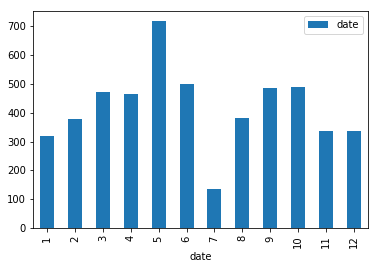

In [37]:
# Vi vælger hvilket data vi vil visualisere

tweet_times = tweet_times_alter 

# Vi ekstraherer for et bestemt hashtag (#dkpol)

df = tweet_times.loc[tweet_times.hashtag == "#dkpol"][['date']] 

# Vi bruger [['date']] for at sikre, at vi får en 
# DataFrame ud af kommandoen, da dette er vigtigt for at kunne bruge "groupby" funktionen i næste linje.

# Vi laver et plot for månedsaktivitet aggregeret over al tid for #dkpol

df.groupby(df["date"].dt.month).count().plot(kind="bar") 

**4.2 Over tid**

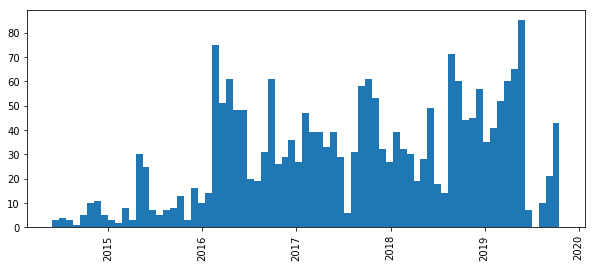

In [38]:
# Vi vælger hvilket data vi vil visualisere

tweet_times = tweet_times_alter 

# Vi ekstraherer for et bestemt hashtag (#dkgreen)

df = tweet_times.loc[tweet_times.hashtag == '#dkgreen'][['date']]

# Vi bruger [['date']] for at sikre, at vi får en 
# DataFrame ud af kommandoen, da dette er vigtigt for at kunne bruge "groupby" funktionen i næste linje.

# Vi printer plottet for Alternativets brug af #dkgreen over tid

plt.figure(figsize=(10, 4))
plt.hist(df.date.values, bins=73)
plt.xticks(rotation=90)
plt.show()

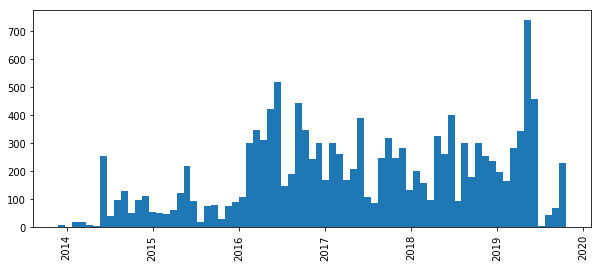

In [39]:
# Vi kan også lave et plot for alle hashtags ved at lave samme kommando uden et filter (`== '#dkgreen'`)
# Så vil kommandoen se sådan her ud: 

df = tweet_times[['date']]

# Vi printer plottet for Alternativets brug af alle hashtags over tid

plt.figure(figsize=(10, 4))
plt.hist(df.date.values, bins=73)
plt.xticks(rotation=90)
plt.show()

**4.3 Over tid (normaliseret)**

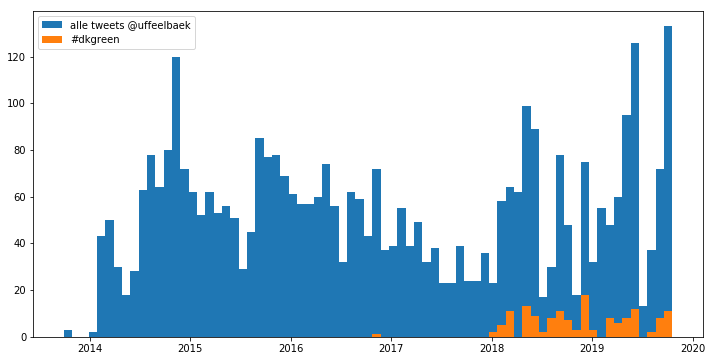

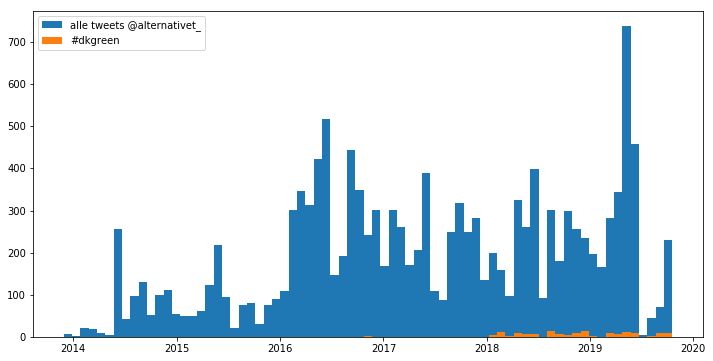

In [40]:
# Vi vælger hvilken data vi vil visualisere 

tweet_times = tweet_times_elbæk 

#Vi definerer Elbæk 

tweet_times_2 = tweet_times_alter 

#Vi definerer Alternativet anderledes end Elbæk, så vi kan køre test seperat

hashtag = "#dkgreen" 

# Vi definerer hashtag til at være #dkgreen

# Vi ekstraherer for et bestemt hashtag (hashtag) => dermed får vi hashtagget #dkgreen

df = tweet_times.loc[tweet_times.hashtag == hashtag][['date']] 

# Vi bruger [['date']] for at sikre, at vi får en DataFrame ud af kommandoen

# Vi plotter histogrammer for alle tweets og bestemt hashtag

plt.figure(figsize=(12, 6))
normvals, bins, _ = plt.hist(tweet_times.date.values, bins=73, label="alle tweets @uffeelbaek")

# Vi laver 73 bins fordi det er antal måneder der er forløbet siden twitterbrugeren blev oprettet.
# Vi får et output der viser hvor meget Uffe har brugt #dkgreen fordelt på måneder siden han åbnede sin bruger

dfvals, bins, _ = plt.hist(df.date.values, bins=bins, label=hashtag)
plt.legend()
plt.show()

# Histogrammet viser andelen af alle de hashtags Uffe har brugt, som har været #dkgreen 
# Specifikt viser de blå søjler andelen af hashtags som er anvendt i alt hver måned siden 2013
# Det orange i bunden af søjlerne angiver den månedlige andel af #dkgreen, 
# som er indgået i det samlede antal hashtags

# Vi laver samme øvelse for Alternativet

plt.figure(figsize=(12, 6))
normvals, bins, _ = plt.hist(tweet_times_2.date.values, bins=73, label="alle tweets @alternativet_")

# Vi fordeler Alternativets brug af #dkgreen i samme antal bins for at få let sammenlignelige histogrammer 

dfvals, bins, _ = plt.hist(df.date.values, bins=bins, label=hashtag)
plt.legend()
plt.show()